真实奖励均值: [-1.50818785 -1.15697848 -0.02302485 -0.72867807 -0.29200855 -0.45403358
  0.99023845 -0.58696569 -0.37734208  0.71728358]
ε=0.1时的最终估计均值: [-1.50526514 -0.60197563  0.06220158 -0.63144873 -0.2911496  -0.08364941
  0.97180192 -0.76634121 -0.4139158   0.46710902]


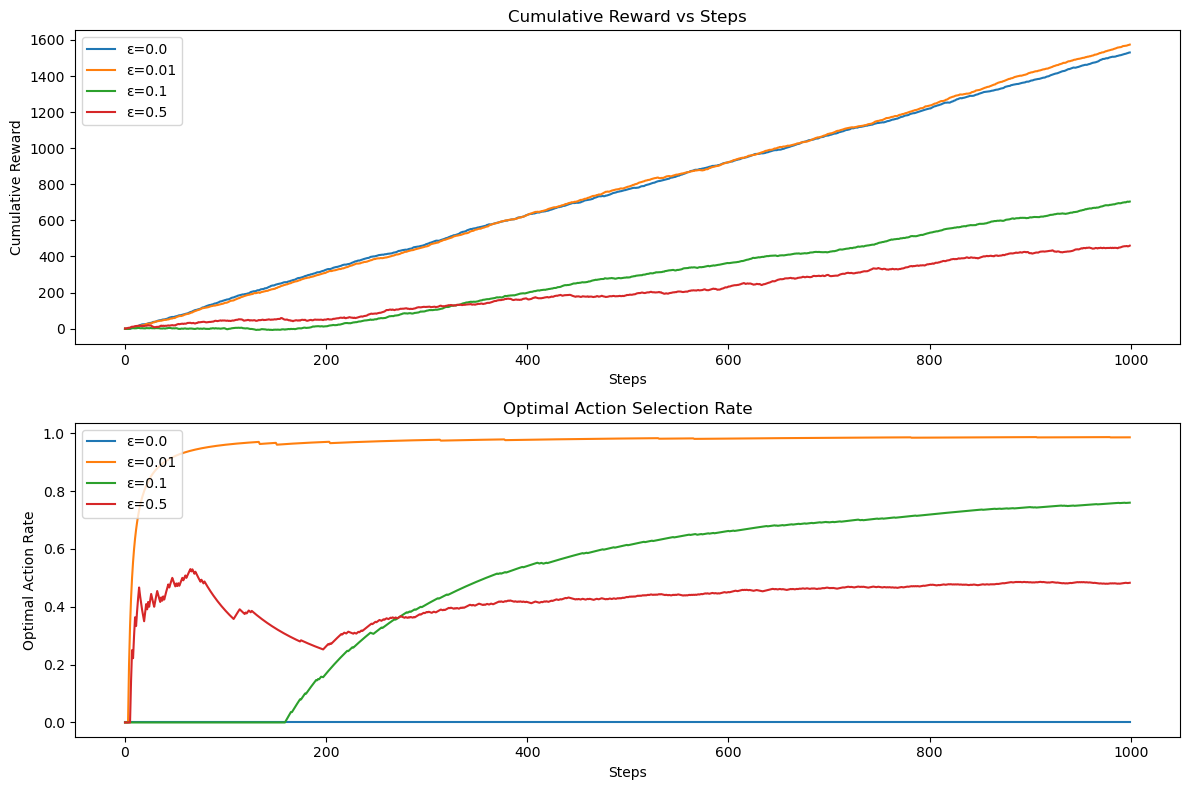

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子（复现结果）
np.random.seed(42)

class EpsilonGreedyBandit:
    def __init__(self, k_arms=10, epsilon=0.1):
        self.k_arms = k_arms          # 摇臂数量
        self.epsilon = epsilon        # 探索概率ε
        self.q_true = np.random.randn(k_arms)  # 每个摇臂的真实奖励均值（初始随机）
        self.q_est = np.zeros(k_arms)          # 每个摇臂的估计奖励均值
        self.action_counts = np.zeros(k_arms)  # 每个摇臂被选择的次数

    def choose_action(self):
        if np.random.random() < self.epsilon:
            # 探索：随机选择一个摇臂
            return np.random.randint(self.k_arms)
        else:
            # 利用：选择当前估计奖励最高的摇臂
            return np.argmax(self.q_est)

    def update_estimates(self, action, reward):
        # 更新摇臂的奖励均值和选择次数
        self.action_counts[action] += 1
        self.q_est[action] += (reward - self.q_est[action]) / self.action_counts[action]

    def run(self, steps=1000):
        rewards = []
        optimal_actions = []  # 记录是否选择了最优摇臂
        optimal_action = np.argmax(self.q_true)  # 真实最优摇臂

        for _ in range(steps):
            action = self.choose_action()
            reward = np.random.normal(self.q_true[action], scale=1.0)  # 带噪声的奖励
            self.update_estimates(action, reward)
            rewards.append(reward)
            optimal_actions.append(action == optimal_action)

        return rewards, optimal_actions

# 参数设置
k_arms = 10
steps = 1000
epsilon_values = [0.0, 0.01, 0.1, 0.5]  # 对比不同ε值

# 运行实验
results = {}
for eps in epsilon_values:
    bandit = EpsilonGreedyBandit(k_arms=k_arms, epsilon=eps)
    rewards, optimal_actions = bandit.run(steps=steps)
    results[eps] = {
        'rewards': rewards,
        'optimal_actions': optimal_actions,
        'q_true': bandit.q_true,  # 真实奖励均值
        'q_est': bandit.q_est    # 估计奖励均值
    }

# 可视化结果
plt.figure(figsize=(12, 8))

# 1. 绘制不同ε的累积奖励对比
plt.subplot(2, 1, 1)
for eps in epsilon_values:
    cumulative_rewards = np.cumsum(results[eps]['rewards'])
    plt.plot(cumulative_rewards, label=f'ε={eps}')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Steps')
plt.legend()

# 2. 绘制不同ε的最优动作选择比例
plt.subplot(2, 1, 2)
for eps in epsilon_values:
    optimal_rate = np.cumsum(results[eps]['optimal_actions']) / (np.arange(steps) + 1)
    plt.plot(optimal_rate, label=f'ε={eps}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action Rate')
plt.title('Optimal Action Selection Rate')
plt.legend()

# 打印真实奖励均值和最终估计均值
print("真实奖励均值:", results[0.1]['q_true'])
print("ε=0.1时的最终估计均值:", results[0.1]['q_est'])

plt.tight_layout()
plt.show()

真实奖励均值: [ 0.24445445  1.03883971  0.10654468  0.63496287 -0.02816691 -0.03218595
  0.08547725 -0.18905792 -1.68657024 -0.76832349]
τ=0.1时的估计均值: [ 0.          1.08076437 -0.2434136   0.70439483  0.         -0.22008017
 -0.39868325  0.         -2.25976605  0.        ]


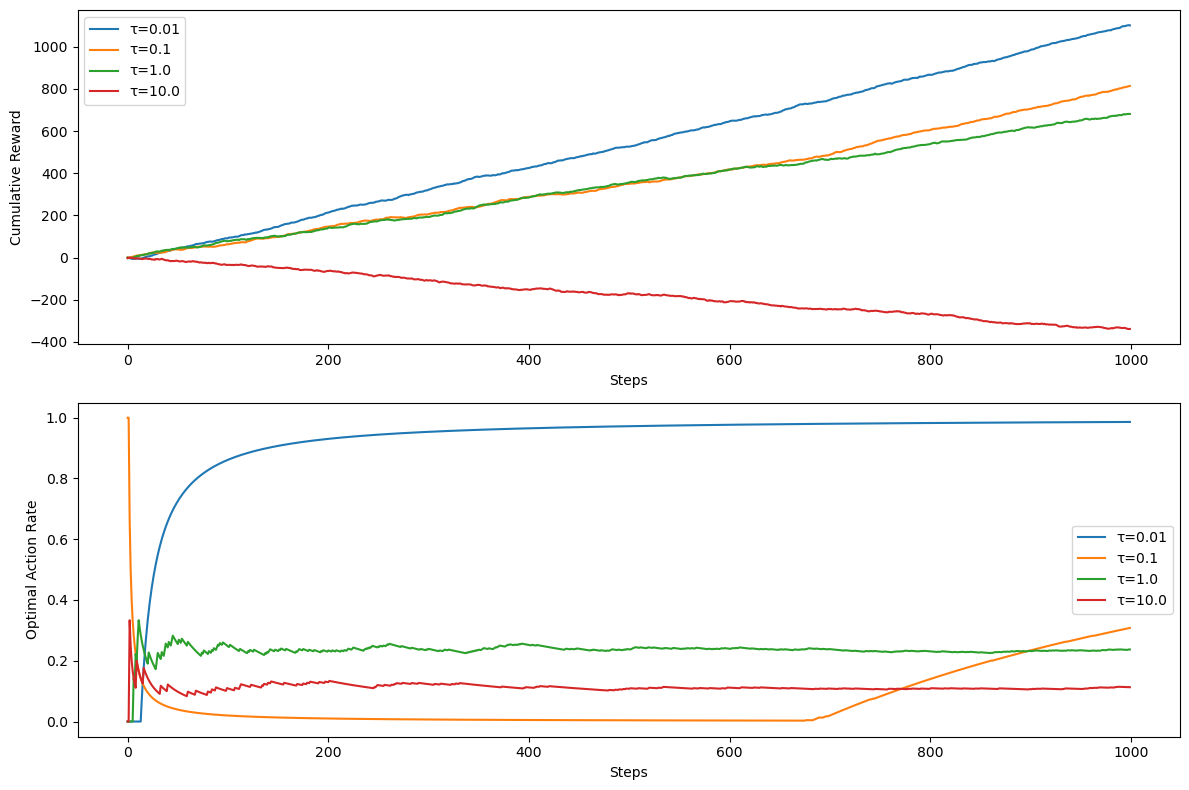

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class SoftmaxBandit:
    def __init__(self, k_arms=10, tau=1.0):
        self.k_arms = k_arms
        self.tau = tau  # 温度参数
        self.q_true = np.random.randn(k_arms)  # 真实奖励均值
        self.q_est = np.zeros(k_arms)          # 估计奖励均值
        self.action_counts = np.zeros(k_arms)  # 摇臂选择次数

    def softmax_prob(self):
        exp_vals = np.exp(self.q_est / self.tau)
        return exp_vals / np.sum(exp_vals)

    def choose_action(self):
        probs = self.softmax_prob()
        return np.random.choice(self.k_arms, p=probs)  # 按概率选择

    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_est[action] += (reward - self.q_est[action]) / self.action_counts[action]

    def run(self, steps=1000):
        rewards = []
        optimal_actions = []
        optimal_action = np.argmax(self.q_true)

        for _ in range(steps):
            action = self.choose_action()
            reward = np.random.normal(self.q_true[action], scale=1.0)
            self.update_estimates(action, reward)
            rewards.append(reward)
            optimal_actions.append(action == optimal_action)

        return rewards, optimal_actions

# 实验设置
k_arms = 10
steps = 1000
tau_values = [0.01, 0.1, 1.0, 10.0]  # 不同温度参数

# 运行实验
results = {}
for tau in tau_values:
    bandit = SoftmaxBandit(k_arms=k_arms, tau=tau)
    rewards, optimal_actions = bandit.run(steps=steps)
    results[tau] = {
        'rewards': rewards,
        'optimal_actions': optimal_actions,
        'q_true': bandit.q_true,
        'q_est': bandit.q_est
    }

# 可视化
plt.figure(figsize=(12, 8))

# 1. 累积奖励对比
plt.subplot(2, 1, 1)
for tau in tau_values:
    cumulative_rewards = np.cumsum(results[tau]['rewards'])
    plt.plot(cumulative_rewards, label=f'τ={tau}')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.legend()

# 2. 最优动作选择比例
plt.subplot(2, 1, 2)
for tau in tau_values:
    optimal_rate = np.cumsum(results[tau]['optimal_actions']) / (np.arange(steps) + 1)
    plt.plot(optimal_rate, label=f'τ={tau}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action Rate')
plt.legend()

# 打印真实奖励和估计奖励
print("真实奖励均值:", results[0.1]['q_true'])
print("τ=0.1时的估计均值:", results[0.1]['q_est'])

plt.tight_layout()
plt.show()